<a href="https://colab.research.google.com/github/musandur/ML-Projects/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> >  **Adversarial robustness: an introductory framework**


$$\textbf{Introduction}$$

Deep learning models are, nowadays, gaining more and more attention due to the exceptional effectiveness they show in a wide spectrum of
applications including autonomous driving, healthcare, natural language processing, etc. However, the success of these
models have, at the same time, raised many security and commercialization concerns. Indeed, a convolutional  neural network (CNN) model
usually exhibits an overwhelming vulnerability when input images are subject to small perturbations. That is, adding small
perturbations (noise) to an input image can result in a misclassification of that image, as shown in this figure (taken from Goodfellow et al. (2014)). 
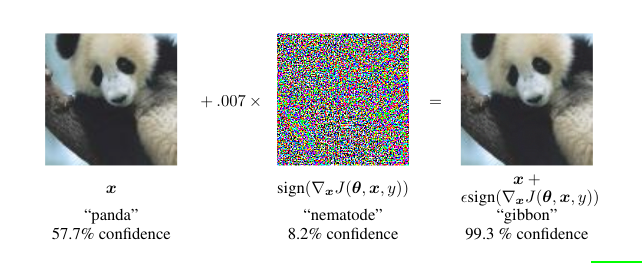





In the figure above, one sees that even if the noise added to the image is imperceptible with human eye, it can be influential enough to fool the CNN model.

These perturbed images are referred to as **adversarial examples**, as they can deeply fool a well trained model. It is thus clear that adversarial examples
can cause trust issues in commercial machine learning models and, thus, stand as barriers against deployment of these models for real world applications. Therefore, to mitigate this issue, it is
crucial to figure out a technical way to overcome the brittleness of CNNs models by making them more robust (or stable) against adversarially perturbed inputs images. That is referred to as **adversarial learning**.

For a given CNN classifier model, we define an **adversarial perturbation** as the **minimal perturbation** of an input image that is sufficient to change a rightly predicted label to either a different carefully targetted label or to any other different label. The latter is reffered to  as an **untargeted attack**, while the former is called a **targeted attack**. If $x$ denotes the input image with a label $y$ and $\tilde{x}$ the adversarial image generated from $x$, then 
 $$\tilde{x} = x + \eta$$
 where $\eta$ is the perturbation added to the clean image $x$. If $\eta$ can cause the CNN model to classify $\tilde{x}$ to a label $y^{\prime} \neq y$ then $\eta$ is a good candidate in finding the optimal adversarial perturbation of $x$.
 
Recently, many successful methods for finding (optimal) adversarial perturbations (or attacks) have been proposed. They range from deep iterative methods, such
as **DeepFool**, to single-step methods such as **Fast Gradient Sign Methods (FGSM)**. Moreover, both Deepfool and FGSM are both **white box** untargetted attack. A white box attack is an adversarial perturbation which assumes that the model (CNN model in this case) is fully known to the attacker (or adversary). 

Formally, a CNN classifier can be represented as
$$f: \mathbb{R}^n \to \mathbb{R}^c, \,\,\, f(x) = \big[f_1(x), f_2(x), \cdots, f_k(x), \cdots, f_c(x)\big].$$
The classifier $f$ has, thus, $c$ outputs and the classification is achieved via the mapping
$$\bar{k}(x) = \arg\max_k f_k(x),$$
where $x$ is an input image. 

Thus, given an input image $x_0$, the minimal perturbation $r_0(x_0)$ needed to change the classifier's decision can be obtained by solving the **optimization problem**

\begin{equation}
\begin{split}
r_*(x_0) &:= \arg\min \|r\|_2\\
         &\text{subject to } \bar{k}(x_0 + r) \geq \bar{k}(x_0),
\end{split}
\end{equation}
where $\|\|_2$ is the $\ell_2$ norm. 

A solution of the above optimization problem is proposed in the DeepFool method as 

$$r_*(x_0) = \frac{\big|f_{\bar{l}(x_0)}(x_0) - f_{\bar{k}(x_0)}(x_0)\big|}{\big\| \nabla_x f_{\bar{l}(x_0)}(x_0) - \nabla f_{\bar{k}(x_0)}(x_0)  \big\|_2^2} \times \big( \nabla_x f_{\bar{l}(x_0)}(x_0) - \nabla_x f_{\bar{k}(x_0)}(x_0) \big )$$

where 
$$ \bar{l}(x_0) = \arg\min_{k\neq \bar{k}(x_0)} \frac{\big|f_{\bar{l}(x_0)}(x_0) - f_{\bar{k}(x_0)}(x_0)\big|}{\big\| \nabla_x f_{\bar{l}(x_0)}(x_0) - \nabla_x f_{\bar{k}(x_0)}(x_0)  \big\|_2}$$

$r_*(x_0) $ corresponds geometrically to the distance between the image $x_0$ and the complement of the region $P$ of the space where the classifier $f$ outputs the label $\bar{k}(x_0)$. That means, solving the above optimization problem is equivalent to computing $\text{dist}(x_0, P^c)$ where $P^c$ denotes the complement of $P$. For more derails about the construction of the solution $r_*(x_0)$, see Moosavie-Dezfooli et al. (2016) where the solution of the optimization problem is constructed step by step and the high level pseudocode of the **iterative algorithm** for computing $r_*(x_0)$ is presented. In fact, the iterative process in the  DeepFool method is conditioned by the relation $\bar{k}(x_0 + r) = \bar{k}(x_0)$. That is, $x_0$ is perturbed to $x_0 + r$ and thus moved towards one of the faces (or boundaries) of $P$. At each perturbation, $r_*(x_0)$ is computed and some updating operations are done. This process continues until we find a perturbed image $\tilde{x}$  with  $\bar{k}(\tilde{x}) \neq \bar{k}(x_0)$. That means $\tilde{x}$ becomes the minimally perturbed version of $x_0$ such that $x_0$ and $\tilde{x}$ are classified into different labels by $f$. Geometrically, one sees that, due to the **repeated perturbations** $r_*(x_0)$, $\tilde{x}$ is now located in $P^c$, while $x_0$ is located in $P$, which is the reason why they no longer share a common label (or class). Indeed, The region $P$ yields all input images which have the same label as $x_0$. Note that the label $\bar{l}(x_0)$ denotes the closest hyperplane to the image $x_0$; it helps us find the right direction in which $x_0$ should be **orthogonally projected** or moved, in simple terms. 
Finally, one can think of the region $P$ as a result of the mutual intersection of decision boundaries generated by the $0$ level sets of the outputs $f_j, j = 1, 2,...,c$. As a consequence, an **alternative of the DeepFool iterative method** may address robustness of the image $x_0$ by measuring how wide the region $P$ is. In other words, the robustness of $x_0$ depends on how close the **decision boundaries** are to $x_0$. However, that sounds challenging, as it may require a full control of the decisions boundaries.

In constrast to the DeepFool iterative method, the FGSM is a single-step classical method of generating an adversarial input image. It is a gradient-based method in the sense that the optimal perturbation is a function, the **gradient of the loss function**, with respect to the variable $x$. That is, attacks are generated by using the equation
$$\tilde{x} = x + \epsilon \text{sign}\big(\nabla_x L(\theta, x, y)\big)$$
where $x$ is the unperturbed input image with its true class $y$, $\epsilon$ is the size (or amplitude) of the perturbation, $L(\theta, x, y)$ is the loss function used to train the model, and $\tilde{x}$ is the perturbed image. 
Note that in order to have $\tilde{x}$, the loss function should be considered to be only a function of $x$. That means, the learned parameters $\theta$ must be frozen. Indeed, one should know that the CNN model has already been successfully trained and, thus, the critical parameters were obtained using (stochastic) gradient descent algorithm, for instance. Now that the loss function is only a function of $x$, the sign its gradient with respect to $x$ yields always the direction of the steepest ascent of the graph $\big(x, L(\theta, x, y)\big)$. That means, when the noise $\epsilon \text{sign}\big(\nabla_x L(\theta, x, y)\big)$ is added to $x$, the function $L(\theta, \tilde{x}, y)$ moves up towards its maximum, in a **single step**. Therefore, $\tilde{x}$ tends to maximize the loss function with respect to the true class. As a matter of fact, instead of explicity finding the minimal perturbation to fool the classifier, the FGSM seeks to alter the image in order to discredit the classifier by increasing its classification error at $\tilde{x}$ and, thus, causes the CNN model to predict label $y^{\prime}\neq y$. Recall that the perturbation is pixel-wise and the gradient can be efficiently computed using backpropagation. To read more about the FGSM, we refer to the original paper Goodfellow et al. (2014). In this work we only choose to introduce the DeepFool and the FGSM adversarial perturbations but other relevant adversarial perturbation techniques were also proposed as well, see Carlini and Wagner (2017) and Szegedy et al. (2013), for instance.

In this work, we are going to use an adversarial perturbation of type FGSM to train a **robust** deep learning
model for a binary image classification. In other words, our ultime goal is to implement a robust CNN model to classify input images into **cats** and **dogs** by using a powerful learning technique called **Neural Structured Learning (NSL)** . The latter is an **open source** framework, recently proposed by **TensorFlow**, for training deep neural network with **structure signals**. The latter are commonly used to represent relations or similarities among samples that may be labeled or unlabeled. That means, structure signals may be understood as edges systematically linking nodes of a  graph of data samples. Moreover, the linking procedure is based on relations of some kind including similarities or connections within data samples. Examples include connections between labeled and unlabeled data based on their similarities, an input image and its perturbed version, relations in **knowledge graph** representations, etc.  Hence, NSL is used to implement  [neural graph learning](https://https://storage.googleapis.com/pub-tools-public-publication-data/pdf/bbd774a3c6f13f05bf754e09aa45e7aa6faa08a8.pdf), which means it enables developers to train a neural network using graphs. In particular, NSL can also be used in the context of adversarial learning. There, the structure between input data samples is dynamically constructed using adversarial perturbation including FGSM. That is, using NSL will help our CNN model to understand that an original input image and its perturbed version are actually the same. This will results in building a robust CNN model which generalizes better once deployed. We will elaborate more on that, in the second part of this work. More information about NSL can be found in [TensorFlow](https://blog.tensorflow.org/2019/09/introducing-neural-structured-learning.html)

This work is divided into two parts. In the first part, we will go through all the standard steps of the training process of a CNN model by using a simplified
cat and dog dataset. In the second and more innovative part, we will build a robust version of the already-trained CNN model using the NSL approach and compare the performance of the standard model and the adversarially trained model.







 > > > **Deep learning and convolutional neural network**


In this first part of this work, we are going to use a small portion of the well-known large cat-dog datasets to build a deep learning model. The latter  will yield a calssification of input **image data** into **cat** or **dog** with the highest accuracy possible. To achieve our goal, we make use of python APIs such as **tensorflow, keras**, and the **tf.data**. The latter API enables us to build complex input pipelines from simple, reusable pieces. An example includes the pipeline for an image model we are going to build. It follows the pattern:

*   Create a source dataset from input data, for data extraction.
*   Apply data transformation including feature extraction, data augmentation, normalization, etc, in order to preprocess the data.

*   Iterate over the dataset and load the elements into CPU/GPU for processing.

For more details about tf.data, visits the this [link](https://www.tensorflow.org/guide/data)


In the code below, we are going to load our dataset and split it into three subsets: **training data, validation data, and test data** .

Concretely, we have 2000 images (1000 cats and 1000 dogs) of training data, 1000 images (500 cats and 500 dogs) of validata data, and 1000 images (500 cats, 500 dogs) images of test data.

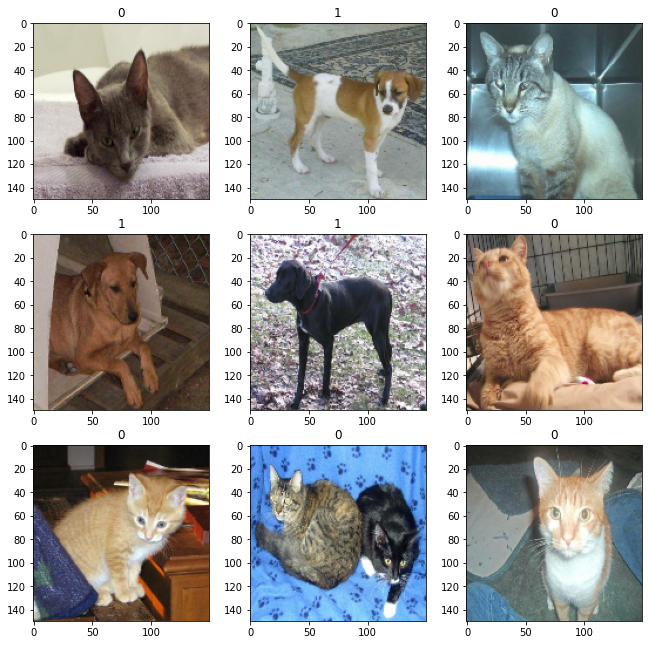

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from glob import glob 



from matplotlib import pyplot as plt
import os
import numpy as np


# sub_dataset directories
# train cats and dogs directories 
train_dir = '/content/drive/MyDrive/dogs-vs-cats_tutorial/train'
train_cats_dir = '/content/drive/MyDrive/dogs-vs-cats_tutorial/train/cats'
train_dogs_dir = '/content/drive/MyDrive/dogs-vs-cats_tutorial/train/dogs'

# validation cats and dogs directories
val_dir  = '/content/drive/MyDrive/dogs-vs-cats_tutorial/validation'
val_cats_dir = '/content/drive/MyDrive/dogs-vs-cats_tutorial/validation/cats'
val_dogs_dir = '/content/drive/MyDrive/dogs-vs-cats_tutorial/validation/dogs'

# test cats and dogs directories
test_dir = '/content/drive/MyDrive/dogs-vs-cats_tutorial/test'
test_cats_dir = '/content/drive/MyDrive/dogs-vs-cats_tutorial/test/cats'
test_dogs_dir = '/content/drive/MyDrive/dogs-vs-cats_tutorial/test/dogs'


#----Authorise and mount my Google drive---#
#from google.colab import drive
#drive.mount('/content/drive')

#-----Unzip my dataset from GC (Google Colab)----'
#!unzip -uq "/content/drive/MyDrive/dogs-vs-cats_tutorial.zip" -d "/content/drive/MyDrive/"


#----Now we build the data pipeline using tf.data API----#
# training dataset with associated labels
train_cats_data = tf.data.Dataset.list_files(os.path.join(train_cats_dir, '*.jpg'), shuffle=False)
train_cats_data = train_cats_data.map(lambda x: (x, 0))

train_dogs_data = tf.data.Dataset.list_files(os.path.join(train_dogs_dir, '*.jpg'), shuffle=False)
train_dogs_data = train_dogs_data.map(lambda x: (x, 1))

train_data = train_cats_data.concatenate(train_dogs_data)

# validation data set with associated labels
val_cats_data = tf.data.Dataset.list_files(os.path.join(val_cats_dir, '*.jpg'), shuffle=False)
val_cats_data = val_cats_data.map(lambda x: (x, 0))

val_dogs_data = tf.data.Dataset.list_files(os.path.join(val_dogs_dir, '*.jpg'), shuffle=False)
val_dogs_data = val_dogs_data.map(lambda x: (x, 1))

validation_data = val_cats_data.concatenate(val_dogs_data)

# test dataset with associated labels: cat(label=0) and dog(label=1)
test_cats_data = tf.data.Dataset.list_files(os.path.join(test_cats_dir, '*.jpg'), shuffle=False)
test_cats_data = test_cats_data.map(lambda x: (x, 0))

test_dogs_data = tf.data.Dataset.list_files(os.path.join(test_dogs_dir, '*.jpg'), shuffle=False)
test_dogs_data = test_dogs_data.map(lambda x: (x, 1))

test_data = test_cats_data.concatenate(test_dogs_data)


# Data preprocessing before training

# load data
def load(file, label):
  # loading the file into tensor
  image = tf.io.read_file(file)
  # now decode the file to jpeg format
  image = tf.image.decode_jpeg(image)
  # and convert image to tf.float32
  image = tf.cast(image, tf.float32)
  return image, label

# resize all image data to a same size
def resize(image, size):
  return tf.image.resize(image, size)

# normalize all image data 
def normalize(image_data):
  image_data = image_data / 255
  return image_data

def load_and_preprocessing_image_data(imageFile, label):
  image, label = load(imageFile, label)
  image = resize(image, [150, 150])
  image = normalize(image)
  return image, label




#print(list(train_data_processed.as_numpy_iterator())[99][1].shape)
buffer_size1 = tf.data.experimental.cardinality(train_data).numpy()
buffer_size2 = tf.data.experimental.cardinality(validation_data).numpy()
buffer_size3 = tf.data.experimental.cardinality(test_data).numpy()


#print(buffer_size)
num_epochs = 30
# preprocessing, shuffling and batching the datasets
train_data = train_data.shuffle(buffer_size1).map(load_and_preprocessing_image_data,num_parallel_calls=tf.data.AUTOTUNE).batch(20).repeat(num_epochs)
validation_data = validation_data.map(load_and_preprocessing_image_data, num_parallel_calls=tf.data.AUTOTUNE).batch(20).repeat(num_epochs)
test_data = test_data.map(load_and_preprocessing_image_data, num_parallel_calls=tf.data.AUTOTUNE).batch(20).repeat(num_epochs)

# Prefetching delegates decision on the level of parallelism for increasing run time performance: performance optimization 
#tecthnique which allows the preprocessing of the data and model execution to overlap.
train_data = train_data.prefetch(2)
validation_data = validation_data.prefetch(2)
test_data = test_data.prefetch(2)

### Plot the shuffled train dataset here #####
plt.figure(figsize=(11, 11))
for images, labels in train_data.take(1):
    #fig, ax = plt.subplots(3, 3)
    for j in range(9):
        image = images[j].numpy()
        #image = image / np.amax(image)
        #image = np.clip(image, 0, 1)
        plt.subplot(3, 3, j+1)
        plt.imshow(image)
        #plt.show()
        plt.title(labels[j].numpy())
plt.show()



Images above are a visual proof of the content of our preprocessed dataset. Indeed, a batch of 9 samples and their respective labels is selected from the first batch of the preprocessed training data. Hence, looking at the displayed images, one sees a mixture of cats (with label **0**) and dogs (with label **1**) pictures. This is a proof that our training data is well shuffled, which is very important for the quality of the training (the updating process of weights and bias) because in batches of every epoch there will be both cat and dog images.

In the following we will build the convolutional neural network model for classification of images into cat or dog.

In [ ]:

# Build the model

model = models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))
#model.summary()







train_data_len = len(glob(os.path.join(train_cats_dir, '*.jpg'))) * 2
val_data_len =  len(glob(os.path.join(val_cats_dir, '*.jpg'))) * 2



model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
             optimizer='Adam',
             metrics=['acc'])


history = model.fit(train_data,
                             steps_per_epoch=train_data_len / 20,
                             epochs= num_epochs,
                             validation_data=validation_data,
                             validation_steps=val_data_len / 20)




Epoch 1/30
100/100 [==============================] - 8s 75ms/step - loss: 0.7194 - acc: 0.5007 - val_loss: 0.6896 - val_acc: 0.5550
Epoch 2/30
100/100 [==============================] - 7s 69ms/step - loss: 0.6868 - acc: 0.5393 - val_loss: 0.6596 - val_acc: 0.5900
Epoch 3/30
100/100 [==============================] - 7s 69ms/step - loss: 0.6618 - acc: 0.6061 - val_loss: 0.6457 - val_acc: 0.6320
Epoch 4/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5995 - acc: 0.6811 - val_loss: 0.7380 - val_acc: 0.5710
Epoch 5/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5973 - acc: 0.6731 - val_loss: 0.6026 - val_acc: 0.6650
Epoch 6/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5222 - acc: 0.7477 - val_loss: 0.5974 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5077 - acc: 0.7439 - val_loss: 0.5828 - val_acc: 0.7170
Epoch 8/30
100/100 [==============================] - 7s 70ms/step - 

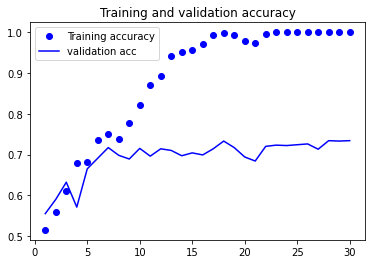

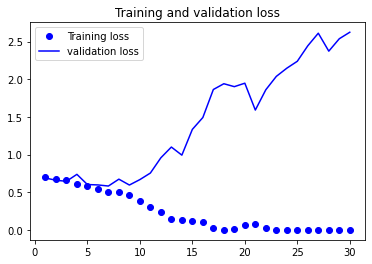

In [ ]:
#### Plot the history of the learning 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Figures above illustrate the so-called **overfitting** scenario, as the model fails to successfully generalize its classification score, given new data from the validation dataset. Indeed, the validation accuracy/loss drops/increases after approximately only four epochs. Note that overfitting occurs when the model starts to learn patterns that are specific to the training data but are misleading when it comes to new data. Overfitting scenario happens usually in almost all machine learning problems, particulary when the models are trained using few data. In this particular situation, the trained model will obviously fail to generalize its performance on unseen data. This can be proven by predicting classes of input images using the **test dataset**, since these are images the model has not yet seen. We show this in the following two code samples. In the first code sample we predict **cat classes**, while in the second we predict **dog classes**, using the test dataset. Note that, in both cases, a **successful classification** is titled with the name of the class in **green color** and a **misclassification** is titled in **red color** with the name of the predicted class $+$ forward slash $+$ the name of the true class.

Random batch index 8:
Accuracy (misclassified/batch_size): 6/20


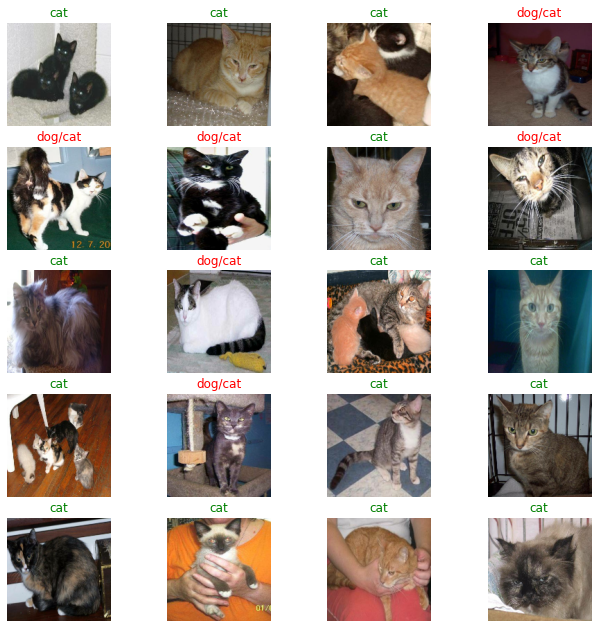

In [ ]:
import random
label_to_name = {0: 'cat', 1: 'dog'}
batch_index_cat = random.randint(0, 24)
print('Random batch index {}:'.format(batch_index_cat))
test_data_batch_cat = [list(test_data)[batch_index_cat]]

#for images, labels in test_data.take(1):
for images_cat, labels_cat in test_data_batch_cat:
  predictions_cat = model(images_cat)

plt.figure(figsize=(11, 11))
k = 0
for i, (imag, y_true, y_pred) in enumerate(zip(images_cat, labels_cat, predictions_cat)):
  plt.subplot(5, 4, i+1)
  if np.argmax(y_pred.numpy()) == y_true.numpy():
    plt.title('{}'.format(label_to_name[y_true.numpy()]), color='green')
  else:
    k +=1
    plt.title('{}/{}'.format(label_to_name[np.argmax(y_pred.numpy())],label_to_name[y_true.numpy()]), color='red')
  
  #plt.subplot(5, 4, i+1)
  plt.imshow(imag.numpy())
  plt.axis('off')
print('Accuracy (misclassified/batch_size): {}/{}'.format(k, 20))






Random batch index 44:
Accuracy (misclassified/batch_size): 5/20


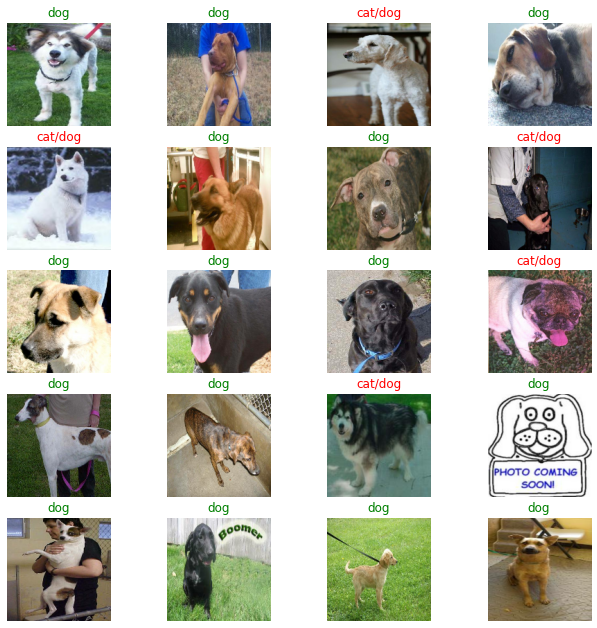

In [ ]:
import random
batch_index_dog = random.randint(25, 49)
print('Random batch index {}:'.format(batch_index_dog))
data_batch_dog = [list(test_data)[batch_index_dog]]
for images_dog, labels_dog in data_batch_dog:
  predictions_dog = model(images_dog)

plt.figure(figsize=(11, 11))
k = 0
for i, (imag, y_true, y_pred) in enumerate(zip(images_dog, labels_dog, predictions_dog)):
  plt.subplot(5, 4, i+1)
  if np.argmax(y_pred.numpy()) == y_true.numpy():
    plt.title('{}'.format(label_to_name[y_true.numpy()]), color='green')
  else:
    k+=1
    plt.title('{}/{}'.format(label_to_name[np.argmax(y_pred.numpy())],label_to_name[y_true.numpy()]), color='red')
  
  #plt.subplot(5, 4, i+1)
  plt.imshow(imag.numpy())
  plt.axis('off')
print('Accuracy (misclassified/batch_size): {}/{}'.format(k, 20))

From these classification performaces, we note that the model usually misclassifies at least $4$ images for very batch of $20$ images. That is actually a lot! It is thus clear that the model need to be improved, in order to be used in applications. 

To prevent such overfitting problem, it is often recommended to find more data to train the model with. A well-known technique used to harness more data is called **data augmentation**. The latter technique consists of artificially expanding the size of the training data by geometrically transforming the training samples. In other words, the intension is to expand the training dataset with new plausible samples in order to increase the model perfomance on unseen data.  
Hovewer, with little data, a deep learning  model designed from scratch has little chance to generalize well, regardless of how many regularization techniques are applied including data augmentation. Note that later in this work, data augmentation will be used in another form for studying robustness of the model under construction.

As a matter of fact, in the following we are going to make use of **transfer  learning** as an alternative to mitigate the overfitting problem and improve accuracy. That means, we are going to use a pretrained network model, which is a deep learning model that was previously trained for image classification on a large dataset. We consider an already trained convolutional neural network called VGG16 which stands as Visual Geometry Group 16 (where 16 is the number of learned layers in the trained model) and developed by Simonyan et al.(2014. This network was trained on the **ImageNet dataset** which consists of over 14 million labeled images including many animal images such as cats and dogs. Hence, this model classifies images into a thousand of classes, and it has, thus, a great potentiel to perform well on a two-class (cat, dog) classification problem. Hence, the VGG16 model as to be downloaded, before any use. That is, learned weights and bias are uploaded.

Recall that, in this tutorial, the main purpose of finding, a priori, an optimally performant model is to study its robusstness by using dversarial learning techniques.

In [ ]:
import tensorflow as tf
model_vgg16 = tf.keras.applications.VGG16(weights='imagenet',
                                         include_top=False,
                                         input_shape=(150, 150, 3))

model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In this work **model_vgg16** will be used, but a few of its top layers will be unfrozen. That is called **fine-tuning**,  as some parameters are slightly adjusted in order to make *model_vgg16* more suitable for our particular classification problem. Indeed, it is well known, in general, that earlier layers of a convolutional neural network encode **more generic reusable features**, while top layers encode more specialized features. In the context of this work, for instance, we view the top layers as encoding patterns such as  dog/cat 's eye, mouth , etc. Hence, we will only unfreeze and fine-tune the top three layers; That is the layer starting from **block5_conv1**. Retraining a pretrained model for a different classification purpose, for instance, is the reason why transfer learning is considered as a breakthrough in deep learning.

The corresponding code is illustrated below.

In [ ]:
model_vgg16.trainable = True
set_trainable = False
for layer in model_vgg16.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In this way, only **block5** is unfrozen and thus, only its corresponding parameters (weights and bias) will be retrained when reusing the **model_vgg16**. In fact, we are going to build a new model which is the concatenation of *model_vgg16* and a dense layer as the classifier. Note that, in general, the dense layer should be already trained before being concatenated to *model_vgg16*. In the folowing, we construct the resulting model and call it **model_base**

In [ ]:
from tensorflow.keras import regularizers

model_base = tf.keras.models.Sequential()
model_base.add(model_vgg16)
model_base.add(tf.keras.layers.Flatten())
model_base.add(Dropout(0.5))
model_base.add(tf.keras.layers.Dense(256, activation='relu'))
model_base.add(tf.keras.layers.Dense(2, activation='softmax'))

model_base.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 514       
Total params: 16,812,610
Trainable params: 9,177,346
Non-trainable params: 7,635,264
_________________________________________________________________


Below, we can verify that the trainable variables of our new model are the weights and bias of *block5_conv1* and the newly added dense classifier.

In [ ]:
for variable in model_base.trainable_variables:
    print(variable.name)



block5_conv1/kernel:0
block5_conv1/bias:0
block5_conv2/kernel:0
block5_conv2/bias:0
block5_conv3/kernel:0
block5_conv3/bias:0
dense_16/kernel:0
dense_16/bias:0
dense_17/kernel:0
dense_17/bias:0


Now, we are ready to **compile and train the model_base**. Note that the name of this model (*model_base*) is purposefully chosen. Indeed, if this model shows a great classification performance, it will be used as **the base model** for the ultimate **adversarial learning problem** that will be addressed. There, the robustness of *model_base* will be challenged on adversarial examples and a robust version of model_base will be learned.

In [ ]:
model_base.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
             optimizer= tf.keras.optimizers.Adam(learning_rate=1e-5),
             metrics=['acc'])


history = model_base.fit(train_data,
                             steps_per_epoch=train_data_len / 20,
                             epochs= num_epochs,
                             validation_data=validation_data,
                             validation_steps=val_data_len / 20)


Epoch 1/30
100/100 [==============================] - 10s 95ms/step - loss: 0.7216 - acc: 0.6164 - val_loss: 0.3669 - val_acc: 0.8660
Epoch 2/30
100/100 [==============================] - 9s 93ms/step - loss: 0.3802 - acc: 0.8158 - val_loss: 0.2551 - val_acc: 0.8840
Epoch 3/30
100/100 [==============================] - 9s 93ms/step - loss: 0.2386 - acc: 0.9037 - val_loss: 0.2069 - val_acc: 0.9160
Epoch 4/30
100/100 [==============================] - 9s 95ms/step - loss: 0.1612 - acc: 0.9352 - val_loss: 0.1941 - val_acc: 0.9190
Epoch 5/30
100/100 [==============================] - 9s 95ms/step - loss: 0.1417 - acc: 0.9479 - val_loss: 0.1881 - val_acc: 0.9230
Epoch 6/30
100/100 [==============================] - 10s 96ms/step - loss: 0.1026 - acc: 0.9595 - val_loss: 0.1738 - val_acc: 0.9240
Epoch 7/30
100/100 [==============================] - 10s 96ms/step - loss: 0.0840 - acc: 0.9710 - val_loss: 0.1799 - val_acc: 0.9240
Epoch 8/30
100/100 [==============================] - 10s 105ms/st

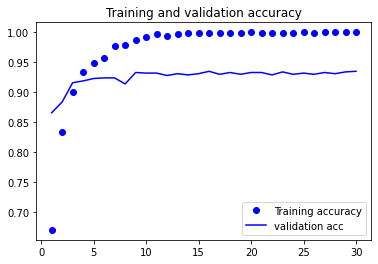

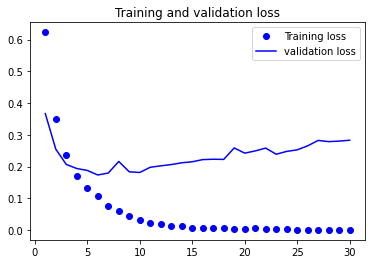

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can see that the **overfitting problem is fixed** thanks to the trasfer learning approach. Now, we need to evaluate the model on the test data.

In [ ]:
test_data_len =  len(glob(os.path.join(test_cats_dir, '*.jpg'))) * 2

result= model_base.evaluate(test_data, steps=test_data_len / 20)
print(result)

50/50 [==============================] - 3s 55ms/step - loss: 0.3137 - acc: 0.9310
[0.31370779871940613, 0.9309999942779541]


We then end up with an accuracy of $93\%$, which is very good enough to trust and rely on the model for deployement. We are then going to confirm this performance using the same graphical illustration as before. That is, we are going to see how well the model will perform on each batch in the test data by visualing the classified images and their predicted classes.

Random batch index 14:
Accuracy (misclassified/batch_size): 1/20


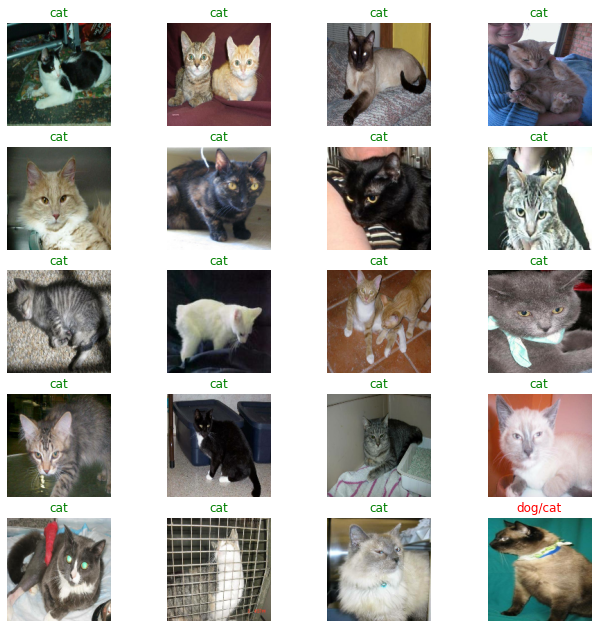

In [ ]:
import random
label_to_name = {0: 'cat', 1: 'dog'}
batch_index_cat = random.randint(0, 24)
print('Random batch index {}:'.format(batch_index_cat))
test_data_batch_cat = [list(test_data)[batch_index_cat]]

#for images, labels in test_data.take(1):
for images_cat, labels_cat in test_data_batch_cat:
  predictions_cat = model_base(images_cat)

plt.figure(figsize=(11, 11))
k = 0
for i, (imag, y_true, y_pred) in enumerate(zip(images_cat, labels_cat, predictions_cat)):
  plt.subplot(5, 4, i+1)
  if np.argmax(y_pred.numpy()) == y_true.numpy():
    plt.title('{}'.format(label_to_name[y_true.numpy()]), color='green')
  else:
    k +=1
    plt.title('{}/{}'.format(label_to_name[np.argmax(y_pred.numpy())],label_to_name[y_true.numpy()]), color='red')
  
  #plt.subplot(5, 4, i+1)
  plt.imshow(imag.numpy())
  plt.axis('off')
print('Accuracy (misclassified/batch_size): {}/{}'.format(k, 20))


Random batch index 30:
Accuracy (misclassified/batch_size): 1/20


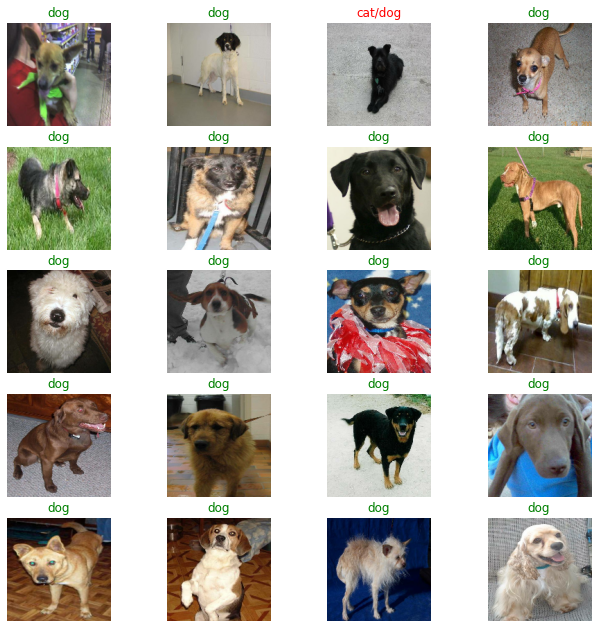

In [ ]:
import random
batch_index_dog = random.randint(25, 49)
print('Random batch index {}:'.format(batch_index_dog))
data_batch_dog = [list(test_data)[batch_index_dog]]
for images_dog, labels_dog in data_batch_dog:
  predictions_dog = model_base(images_dog)

plt.figure(figsize=(11, 11))
k = 0
for i, (imag, y_true, y_pred) in enumerate(zip(images_dog, labels_dog, predictions_dog)):
  plt.subplot(5, 4, i+1)
  if np.argmax(y_pred.numpy()) == y_true.numpy():
    plt.title('{}'.format(label_to_name[y_true.numpy()]), color='green')
  else:
    k+=1
    plt.title('{}/{}'.format(label_to_name[np.argmax(y_pred.numpy())],label_to_name[y_true.numpy()]), color='red')
  
  #plt.subplot(5, 4, i+1)
  plt.imshow(imag.numpy())
  plt.axis('off')
print('Accuracy (misclassified/batch_size): {}/{}'.format(k, 20))

As a result, we observe that our improved model works very well. Indeed, in most of the cases, images are all successfully classified (see green titled images) for every randomly chosen batch on the dataset. Therefore, we are going to consider this model as valid and pick it as our **model base** for the rest of this work. In fact, that is the reason why we named it **model_base**. Indeed, in the following, we are going to **challenge the robustness** of *model_base*.

 > > >   **Robustness and adversarial learning**





We start by briefly explaining the **Neural Structured Learning (NSL)** as follows: \\
if we suppose that the already-built CNN model (*model_base*) generalizes well enough, then if we pick two images that are almost identical (i.e. one is an adversarial perturbation of the other) and put them through the model, then when those two images come out of the CNN algorithm in a hidden layer before the softmax layer, their respective probability distributions should be identical.

Our aim, in this section, is to adversarially retrain the CNN model in the previous section in order to have it generalize almost perfectly to adversarially perturbed images. However, with the NSL framework, retraining the *model_base* is equivalent to an advanced form of a **regularizating** the training of the underlying CNN model. In fact, that is done by comprimising between forcing the model to learn accurate predictions and maintaining the similarity among inputs (i.e. similarity between original images and their adversarially perturbed versions). Hence, the **loss function of the adversarial training** is formally given by
$$loss = \sum_{i=1}^{N} L(y_i, \hat{y}_i) + \lambda \sum_{i=1}^N L_{\mathcal{N}}(y_i, x_i, \mathcal{N}(x_i))$$ 

where $y_i$ is the true label of $x_i$ (ground truth) and $\hat{y}_i$ is the predicted label by the classifier $f$ defined in the introduction. Thus, the first term $\sum_{i=1}^{N} L(y_i, \hat{y}_i)$ of the loss function $loss$ is just the supervised loss associated with *model_base* (i.e. the loss function of the original classifier $f$). Note that previously we did not cleary express the supervised loss but it is just the aggregaation of loss functions of individual data points. \\
The second term $\sum_{i=1}^N L_{\mathcal{N}}(y_i, x_i, \mathcal{N}(x_i))$ is referred to as the **neighbor loss**, as it computes the distance between $x_i$ and its adversarially perturbed versions. Indeed, $\mathcal{N}(x_i)$ yields the set of neighbors of $x_i$. These are the data points that share significant similarities with $x_i$. In the context of this work, $\mathcal{N}(x_i)$ is just the set of images that are adversarially perturbed versions of $x_i$ with the FGSM, for every $x_i$ in the training dataset. In more details thus, $L_{\mathcal{N}}(y_i, x_i, \mathcal{N}(x_i))$ can be written as 
$$L_{\mathcal{N}}(y_i, x_i, \mathcal{N}(x_i)) = \sum_{x_j \in \mathcal{N}(x_i) } w_{ij}\cdot \mathcal{D}(h(x_i), h(x_j))$$ 
where $h(\cdot)$  yields the distribution of features within the underlying hidden layer before the softmax layer. $\mathcal{D}$ is a distance metric, say Euclidian $\ell_2$ metric. $w_{ij}$ measures how strong the connection between $x_i$ and $ x_j$ is; it can be thought of as a weight between two nodes in a graph. Note that the $x_j$'s in $\mathcal{N}(x_i)$ are the same as the $ \tilde{x}_j$'s as defined in the introduction. Thus, the neighbor loss of the adversarial training seeks to measure differences between the distribution of features generated by $x_i$ and the distributions of features generated by its neighbors $\mathcal{N}(x_i)$ within a hidden layer. As a matter of fact, by minimizing  $\sum_{i=1}^N L_{\mathcal{N}}(y_i, x_i, \mathcal{N}(x_i))$ we means that we want to force the CNN model to view and encode $x_i$ and its neighbors (the $ \tilde{x}_j$'s), as being the same thing whatsoever. For more information regarding the analytic formula of the loss function $loss$ visit  [here](https://blog.tensorflow.org/2019/09/introducing-neural-structured-learning.html).\\

Furthermore in my understanding, minimizing the neighbor loss means that the CNN model must find and associate dominant patterns that are present in $x_i$ and that are also present in the $ \tilde{x}_j$'s after an adversarial perturbation (here, FGSM perturbation). These dominant patterns are just the robust features that are present among the features generated by the image $x_i$ in a given hidden layer. This is actually discussed in the paper [**Adversarial Examples Are Not Bugs, They Are Features**] where the authors proved that adversarial examples may just be an intrinsic property to the underlying data point. Indeed, they proved that any image data point can be separated into its **robust features** and its **non-robust features**. That is, any given data point, thus, holds these two kind of features. Moreover, training on either of those two features yields a classifier that performs well on a test set. However, the classifier obtained by training with the robust features show robustness to adversarial examples, while the classifier obtained by training with the non-robuste features exhibits **brittleness to adversarial exampples**. \\
Therefore, adversarially training the underlying CNN model (say *model_base*) using adversarial examples may be equivalent to systematically forcing the model to **ignore or eliminate the non-robust features** within the unperturbed images $x_i$'s by comparing the latter to their adversarially perturbed versions(say the $ \tilde{x}_j$'s). That is achieved by minimizing both the supervised loss (that is the loss function of the base model) andthe added **regularization term**. That is, we formally minimize the function 

$$loss = \sum_{i=1}^{N} L(y_i, \hat{y}_i) + \lambda \sum_{i=1}^N  \sum_{x_j \in \mathcal{N}(x_i) } w_{ij}\cdot \mathcal{D}(h(x_i), h(x_j))$$
where the **neighbor loss (or adversarial loss) is the regularization term**, $\lambda$ is the **regularization parameter**, and $N$ is the number of training data. Note that the regularization term or neighbor loss is not uniquely defined by the formula above (i.e. $\sum_{i=1}^N  \sum_{x_j \in \mathcal{N}(x_i) } w_{ij}\cdot \mathcal{D}(h(x_i), h(x_j))$). Indeed, that term is general to neural graph learning and assumes that the neighbor loss is computed from a hidden layer before the softmax layer. In this specific classification task, we can substitute the neighbor loss with a **more comprehensible loss function that includes the softmax layer**. That is, we make use of the supervised loss 
$$  \sum_{x_j \in \mathcal{N}(x_i) } L(y_i, f(x_j)).$$
This supervised loss calculates the difference between the ground truth $y_i$ and the predicted label $f(x_j)$ of the neighbors $x_j$. Therefore, in the application section below, where we will apply the NSL framework, we will use the adversarial loss 
$$loss = \sum_{i=1}^{N} L(y_i, \hat{y}_i) + \lambda \sum_{i=1}^N  \sum_{x_j \in \mathcal{N}(x_i) } L(y_i, f(x_j)).$$

Now, one sees that adversarial training can be implicitly comprehended as a pattern matching optimization task. That is, the robust features in original data points should remain unchanged in the adversarially perturbed data points so that the CNN can recognize them, match them, and thus, encode them as being the same. Hence, on my own terms, I would like to refer to these robust features as **coherent features**, in the sense that they remain unchanged after an adversarial perturbation (in this case FGSM perturbation). The use of the term **coherent** comes from my previous research activities, where I heavily worked on numerically computing robust patterns under external perturbations, and predict qualitative changes of those patterns. The latter are generated from a statistcial approach of analysing robust clusters that emerge from the dynamics of some physical phenomenon. 

In a near future work, new methods including coherent patterns searching for detecting and computing these coherent features may be be proposed. That is, input images should be studied based on the among of robust and non-robust features they intrinsically hold. That may be very beneficial in explaining, with visual proofs, the adversarial robustness of a given CNN model, since adversarial robustness seems to be an intrinsic property of the data points; thus the model.

Now, we are going to use the NSL API to build robust CNN model from the model obtained in the firs section. We first install the neural structured learing package.

In [ ]:
pip install --quiet neural-structured-learning


Next, we define some additional necessary hyperparameters including the reguarization parameter (adv_multiplier) described previously, the amplitude of the FGSM perturbation (adv_step_size), and the norm to measure the magnitude of adversarial perturbation (adv_grad_norm)

In [ ]:
# importing the nsl API
import neural_structured_learning as nsl


# first we define all the necesssary hyperparameters
class HyperParams(object):
  def __init__(self):
    self.adv_multiplier=0.2
    self.adv_step_size=0.01
    self.adv_grad_norm='infinity'
  
Hparamtrs = HyperParams()

# we first create a config object
# adv_config is an instance for cnfiguring adversarial regularization

adv_config = nsl.configs.make_adv_reg_config(
    multiplier=Hparamtrs.adv_multiplier,
    adv_step_size=Hparamtrs.adv_step_size,
    adv_grad_norm=Hparamtrs.adv_grad_norm
)

We need to convert our dataset from **tuple to dictionary**. In fact, when training the adversarial CNN model, the adversarial loss will need to have access explicitly to the label information, as described in the previous section. Hence, it is easier to reformulate the dataset as a dictionary for easy access of both label and inputs.

In [ ]:
IMAGE_INPUT_NAME = 'image'
LABEL_INPUT_NAME = 'label'

def convert_to_dictionaries(image, label):
  return {IMAGE_INPUT_NAME: image, LABEL_INPUT_NAME: label}

In [ ]:
adv_model_vgg16 = tf.keras.applications.VGG16(weights='imagenet',
                                         include_top=False,
                                         input_shape=(150, 150, 3))

#adv_model_vgg16.summary()

Now, we can wrap the base model (*model_base*) with AdversarialRegularization. Here, we can create a new base model (say *adv_model_base*), so that the existing one (*model_base*) can be used later for performance-base comparison with the ultimately built robust model.

In [ ]:
adv_model_base = tf.keras.models.Sequential()
adv_model_base.add(adv_model_vgg16)
adv_model_base.add(tf.keras.layers.Flatten())
adv_model_base.add(Dropout(0.5))
adv_model_base.add(tf.keras.layers.Dense(256, activation='relu'))
adv_model_base.add(tf.keras.layers.Dense(2, activation='softmax'))

model_base.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 514       
Total params: 16,812,610
Trainable params: 9,177,346
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
adv_model = nsl.keras.AdversarialRegularization(
    adv_model_base,
    label_keys=[LABEL_INPUT_NAME],
    adv_config=adv_config
)


train_data_for_adv_model = train_data.map(convert_to_dictionaries)
validation_data_for_adv_model = validation_data.map(convert_to_dictionaries)
test_data_for_adv_model = test_data.map(convert_to_dictionaries)


Now, we can train and evaluate the above adversarial regularized model, i.e. **adv_model**. The synthax is the same as what we did with the base model. Note that the dversarial examples, which are at the heart of adversarial training, will be generated **on the fly** by AdversarialRegularization.

In [ ]:
adv_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
             optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
             metrics=['acc'])



adv_history = adv_model.fit(train_data_for_adv_model,
                             steps_per_epoch=train_data_len / 20,
                             epochs= num_epochs,
                             validation_data=validation_data_for_adv_model,
                             validation_steps=val_data_len / 20)


Epoch 1/30


100/100 [==============================] - ETA: 0s - loss: 0.9805 - sparse_categorical_crossentropy: 0.7441 - sparse_categorical_accuracy: 0.5673 - scaled_adversarial_loss: 0.2363WARNING:tensorflow:The dtype of the source tensor must be floating (e.g. tf.float32) when calling GradientTape.gradient, got tf.int32


100/100 [==============================] - 42s 398ms/step - loss: 0.9792 - sparse_categorical_crossentropy: 0.7432 - sparse_categorical_accuracy: 0.5680 - scaled_adversarial_loss: 0.2360 - val_loss: 0.7082 - val_sparse_categorical_crossentropy: 0.4725 - val_sparse_categorical_accuracy: 0.8010 - val_scaled_adversarial_loss: 0.2358
Epoch 2/30
100/100 [==============================] - 40s 399ms/step - loss: 0.5916 - sparse_categorical_crossentropy: 0.3966 - sparse_categorical_accuracy: 0.8419 - scaled_adversarial_loss: 0.1951 - val_loss: 0.5702 - val_sparse_categorical_crossentropy: 0.2818 - val_sparse_categorical_accuracy: 0.8890 - val_scaled_adversarial_loss: 0.2884
Epoch 3/30
100/100 [==============================] - 40s 402ms/step - loss: 0.3979 - sparse_categorical_crossentropy: 0.2044 - sparse_categorical_accuracy: 0.9389 - scaled_adversarial_loss: 0.1935 - val_loss: 0.4194 - val_sparse_categorical_crossentropy: 0.1838 - val_sparse_categorical_accuracy: 0.9310 - val_scaled_adversa

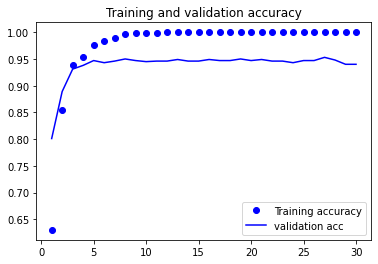

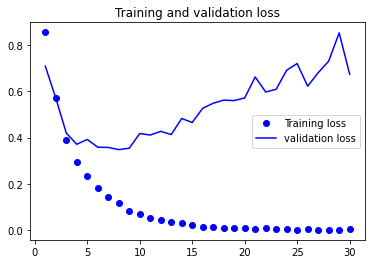

In [ ]:
adv_acc = adv_history.history['sparse_categorical_accuracy']
adv_val_acc = adv_history.history['val_sparse_categorical_accuracy']
adv_loss = adv_history.history['loss']
adv_val_loss = adv_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, adv_acc, 'bo', label='Training accuracy')
plt.plot(epochs, adv_val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, adv_loss, 'bo', label='Training loss')
plt.plot(epochs, adv_val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
adv_results = adv_model.evaluate(test_data_for_adv_model, steps=test_data_len / 20)
adv_named_results = dict(zip(adv_model.metrics_names, adv_results))
print('\naccuracy:', adv_named_results['sparse_categorical_accuracy'])

50/50 [==============================] - 8s 165ms/step - loss: 0.6753 - sparse_categorical_crossentropy: 0.2444 - sparse_categorical_accuracy: 0.9420 - scaled_adversarial_loss: 0.4309

accuracy: 0.9419999718666077


Therefore, the adversarial regularized model performs very well with  94\% accuracy on the test data. This, indeed, confirms the trends observed in the figure above (training and validation accuracy).  We can, thus, rely on our underlying aversarial regularized model  to **mitigate adversarial attacks**. Thus, in the folowing we are going to compare the standard model (*model_base*) and the adversarial regularizized model (*adv_model*) on aversarially perturbed images.

With the NSL framework, **AdversarialRegularization.perturb_on_batch**  fuction is used to generate adversarial examples. Moreover, as discribed in the introduction, we generate adversarial examples with the FGSM method, which based on the standard model (*model_base*). That is why the latter is wrap with the **AdversarialRegularization**, in the following sample code.


In [ ]:
reference_model = nsl.keras.AdversarialRegularization(
    model_base,
    label_keys=[LABEL_INPUT_NAME],
    adv_config=adv_config)
reference_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc'])


In the code above, **reference_model** is the same as **model_base** since it is just compiled but not fit (i.e. reference_model.fit()). That is, learned parameters in **model_base** are the same one in **reference_model**. Besides, **reference_model** is designed to yield adversarial examples, thanks to **AdversarialRegularization**

Now, we construct disctionaries where models to be evaluated and metrics for each of these models are respectively collected and stored inside. 

In [ ]:
models_to_eval = {
    'base': model_base,
    'adv-regularized': adv_model
}
metrics = {
    name: tf.keras.metrics.SparseCategoricalAccuracy()
    for name in models_to_eval.keys()
}

Now, we are ready to generate adversarially perturbed examples and evaluate the different models (the standard model and the adversarial model) with them. We thus save the **perturbed images**, **true labels**, and the **predictions** for later use.

In [ ]:
perturbed_images, labels, predictions = [], [], []
batch_count = -1
for batch in test_data_for_adv_model:
  batch_count = batch_count + 1
  perturbed_batch_for_base_model = reference_model.perturb_on_batch(batch)
  perturbed_batch_for_adv_model = reference_model.perturb_on_batch(batch)

  perturbed_batch_for_base_model[IMAGE_INPUT_NAME] = tf.clip_by_value(                          
      perturbed_batch_for_base_model[IMAGE_INPUT_NAME], 0.0, 1.0)
  perturbed_batch_for_adv_model[IMAGE_INPUT_NAME] = tf.clip_by_value(                          
      perturbed_batch_for_adv_model[IMAGE_INPUT_NAME], 0.0, 1.0)
  
  y_true = perturbed_batch_for_base_model.pop(LABEL_INPUT_NAME)
  perturbed_images.append(perturbed_batch_for_base_model[IMAGE_INPUT_NAME].numpy())
  labels.append(y_true.numpy())
  predictions.append({})

  for name, model in models_to_eval.items():
    if name=='base' :
      y_pred = model(perturbed_batch_for_base_model[IMAGE_INPUT_NAME])
    if name=='adv-regularized' :
      y_pred = model(perturbed_batch_for_adv_model)
    #y_pred = model(perturbed_batch)
    metrics[name](y_true, y_pred)
    predictions[-1][name] = tf.argmax(y_pred, axis=-1).numpy()

  if batch_count == 49 :
    break

for name, metric in metrics.items():
  print('%s model accuracy: %f' % (name, metric.result().numpy()))

base model accuracy: 0.187000
adv-regularized model accuracy: 0.859000


As a result, we observe that the standard model has 18\% accuracy (**bbase model accuracy: 0.187000**) on adversarially perturbed images, while the adversarially trained model has 85\% accuracy (**adv-regularized model accuracy: 0.859000**). These results confirm the brittleness nature of our deep learning model (*model_base*). Indeed, we observe that the base model (*model_base*) decreases dramatically from 93\% accuracy to 18\% accuracy. Such remarkable decline of the accuracy is a prove of the weakness of our standard CNN model to stand against adversarial attacks. As a matter of fact, the adversarial regularized model (*adv_model*) is used as an alternative for preventing our CNN model to be fooled, as it was trained using adversarial examples as explained previously. As a result, *adv_model* exhibits way more robutsness than *model_base*, since it has an accuracy of about 85\% on adversarially perturbed images. Note that the accuracy of *adv_model* has also declined from 94\% to 85\%. However, this drop in accuracy is acceptable, given that only a relative percentage of 9\% is  misclassified with respect to the previous correctly classified images. We can, therefore, argue without exaggeration that we have achieved our goal which was to build a robust CNN model under adversarial attacks.

In the following and last part of this section, we will visualize adversarially perturbed images and their classifications generated by both the standard model (*model_base*) and the robust model (*adv_model*). 

We randomly seclect a batch of 20 adversarially perturbed images of either cats or dogs, we then classify them with both the base model (*model_base*) and the adversarially regulized model (*adv_model*). We recall that the adversarial perturbation is of type FGSM and perturbed images are still clearly recognizable by human eye as it will be shown later. We first start with classifying random batches of perturbed cat images.

accuracy in batch 18:
base model: 6 / 20
adv-regularized model: 19 / 20


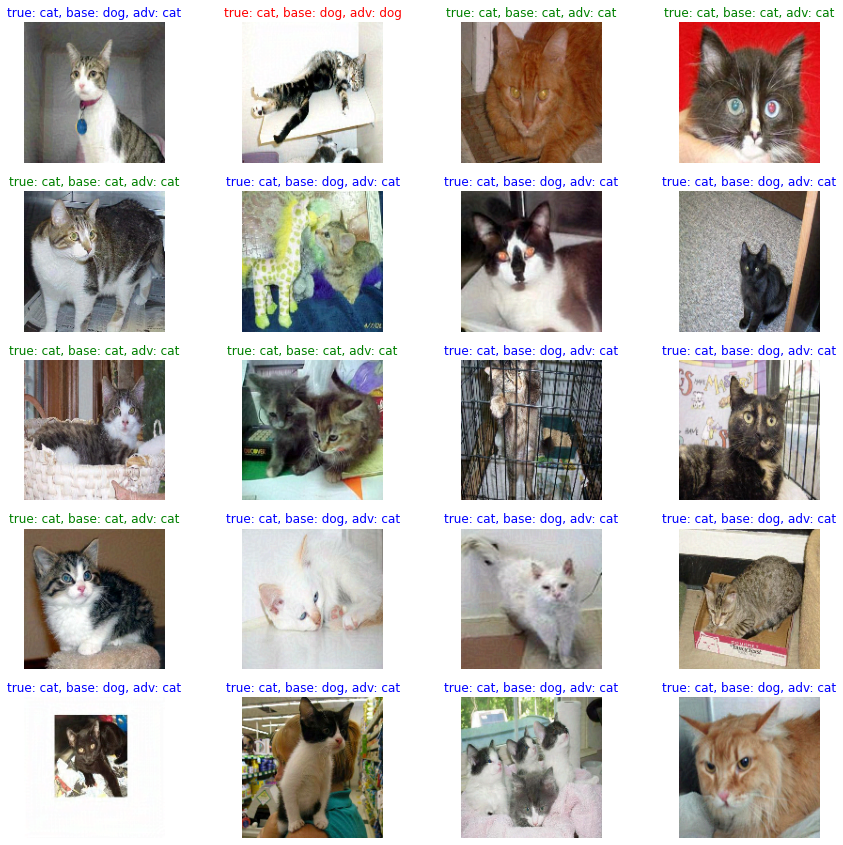

In [ ]:
import random
batch_index = random.randint(0, 24)


batch_image = perturbed_images[batch_index]
batch_label = labels[batch_index]
batch_pred = predictions[batch_index]

batch_size = 20
n_col = 4
n_row = (batch_size + n_col - 1) / n_col

print('accuracy in batch %d:' % batch_index)
for name, pred in batch_pred.items():
  print('%s model: %d / %d' % (name, np.sum(batch_label == pred), batch_size))

plt.figure(figsize=(15, 15))
for i, (image, y) in enumerate(zip(batch_image, batch_label)):
  y_base = batch_pred['base'][i]
  y_adv = batch_pred['adv-regularized'][i]
  plt.subplot(n_row, n_col, i+1)
  if y == y_adv:
    if y_base==y_adv:
      plt.title('true: {}, base: {}, adv: {}'.format(label_to_name[y], label_to_name[y_base], label_to_name[y_adv]), color='green')
      plt.imshow(tf.keras.preprocessing.image.array_to_img(image), cmap='gray')
      plt.axis('off')
    else:
      plt.title('true: {}, base: {}, adv: {}'.format(label_to_name[y], label_to_name[y_base], label_to_name[y_adv]), color='blue')
      plt.imshow(tf.keras.preprocessing.image.array_to_img(image), cmap='gray')
      plt.axis('off')

    
  else:
    plt.title('true: {}, base: {}, adv: {}'.format(label_to_name[y], label_to_name[y_base], label_to_name[y_adv]), color='red')
    plt.imshow(tf.keras.preprocessing.image.array_to_img(image), cmap='gray')
    plt.axis('off')


plt.show()

The above results are displayed in the following way. In each classified perturbed image, the **true class**, the **class predicted by the base model**, and the **class predicted by the robust model** are written in the image title. **Blue colored image titles** indicate that the adversarially perturbed image is correctly classified by the robust model but wrongly classified by the base model. **Green colored image titles** mean that the adversarially perturbed image is correctly classified by both the base mode  (*model_base*) and the robust model (*adv_model*). Finally, the **red colored image titles** indicate that the adversarially perturbed image is misclassified by both the base model and robust model. One can easily  see that there are more blue colored titles in each randomly selected batch of perturbed images. That means, **the base model was successfully fooled** by the attacks and, hence, yields poor classification performance by **classifying cats into dogs**. On the other hand, the robust model displays good classification performance by successfully neutralizing adversarial attacks. That is, adversarially perturbed cat images are still successfully classified as cats by our robust model.

The same analysis holds with batches of adversarially perturbed dog images (see sample code below and the following pictures).

accuracy in batch 32:
base model: 1 / 20
adv-regularized model: 17 / 20


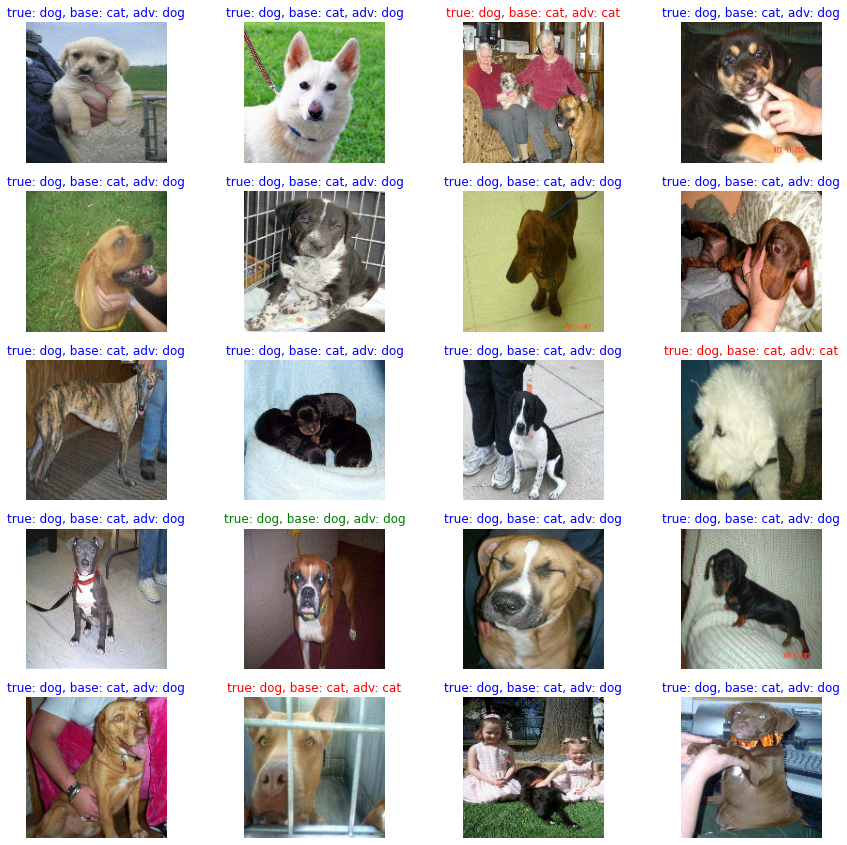

In [ ]:
import random
batch_index = random.randint(25, 49)

#batch_index = 35
batch_image = perturbed_images[batch_index]
batch_label = labels[batch_index]
batch_pred = predictions[batch_index]

batch_size = 20
n_col = 4
n_row = (batch_size + n_col - 1) / n_col

print('accuracy in batch %d:' % batch_index)
for name, pred in batch_pred.items():
  print('%s model: %d / %d' % (name, np.sum(batch_label == pred), batch_size))

plt.figure(figsize=(15, 15))
for i, (image, y) in enumerate(zip(batch_image, batch_label)):
  y_base = batch_pred['base'][i]
  y_adv = batch_pred['adv-regularized'][i]
  plt.subplot(n_row, n_col, i+1)
  if y == y_adv:
    if y_base==y_adv:
      plt.title('true: {}, base: {}, adv: {}'.format(label_to_name[y], label_to_name[y_base], label_to_name[y_adv]), color='green')
      plt.imshow(tf.keras.preprocessing.image.array_to_img(image), cmap='gray')
      plt.axis('off')
    else:
      plt.title('true: {}, base: {}, adv: {}'.format(label_to_name[y], label_to_name[y_base], label_to_name[y_adv]), color='blue')
      plt.imshow(tf.keras.preprocessing.image.array_to_img(image), cmap='gray')
      plt.axis('off')

    
  else:
    plt.title('true: {}, base: {}, adv: {}'.format(label_to_name[y], label_to_name[y_base], label_to_name[y_adv]), color='red')
    plt.imshow(tf.keras.preprocessing.image.array_to_img(image), cmap='gray')
    plt.axis('off')


plt.show()

$$\textbf{Conclusion}$$

In this work, we have given a fairly short introduction of adversarial robustness in deep learning. We have briefly analytically introduced two types of adversarial perturbations: an iterative method known as DeepFool and an one step adversarial perturbation method known as FGSM. Unsing the latter and a relatively small portion of the well known dog-cat imade dataset, we have successfully **built, attacked, and defended** a CNN model. All that was possible thanks to the **neural structured learning TensorFlow framework**. The purpose of this work is to serve as an educational contribution in the field of adversarial machine learning. 

Artificial intelligence, deep learning, and adversarial robustness have appeared to be very interesting to me. Therefore, I am now very dedicated and passionate to pursue a professional career within these exciting and growing fields. In particular, I would like to work on research and development projects. There, I could use my research skills to create innovative solutions for improving/developing industrial products from which humanity can benefit. 